In [224]:
import numpy as np
import math
# import networkx as nx
np.set_printoptions(edgeitems=30, linewidth=100)

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import itertools
%matplotlib inline 

In [225]:
test = [26.9,26.93,27.26, 26.88, 27.72, 29.26, 42.37, 41.93, 42.47, 41.78, 42.67, 43.66, -2]
angles = np.deg2rad(np.arange(-60,70,10)) #in radians

In [226]:
((np.sin(angles) * test)//5)+14, (np.cos(angles) * test)//5

(array([ 9.,  9., 10., 11., 12., 12., 14., 15., 16., 18., 19., 20., 13.]),
 array([ 2.,  3.,  4.,  4.,  5.,  5.,  8.,  8.,  7.,  7.,  6.,  5., -1.]))

In [227]:
xvals = (np.round((np.sin(angles) * test)/5, 0)+14).astype(int)
yvals = ((np.cos(angles) * test)//5).astype(int)


## Mapping 

In [228]:
mapping = np.zeros([30,30], dtype='int')

# start = (0,14)
# goal = (20,14)
mapping[0][14] = 9
mapping[20][14] = 9
mapping

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

In [229]:
def check_way(p1,p2):
    dec0=False
    dec1=False
    inc0=False
    inc1=False
    
    if p1[0] < p2[0]:
        inc0=True
    elif p1[0] > p2[0]:
        dec0=True

    if p1[1] < p2[1]:
        inc1=True
    elif p1[1] > p2[1]:
        dec1=True
    return inc0, dec0, inc1, dec1

def incremental_step(newp, p2, inc0, dec0, inc1, dec1):
    add0 = 1
    add1 = 1
    if dec0:
        add0 = -1
    if dec1:
        add1 = -1
        
    if math.dist([newp[0]+add0, newp[1]], p2) > math.dist([newp[0], newp[1]+add1], p2):
        newp[1] += add1
    else:
        newp[0] += add0
        
    return newp

def get_manhattan(p1, p2):
    if (math.dist(p1,p2)) < 4:
        inc0, dec0, inc1, dec1 = check_way(p1,p2)
        
        newp = p1
        path_list = []
        times = 0
        
        while (math.dist(newp, p2) > 0) and (times < 6):
            newp = incremental_step(newp, p2, inc0, dec0, inc1, dec1)
            path_list.append(newp.copy())
            inc0, dec0, inc1, dec1 = check_way(p1,p2)
            times += 1
            
        if times == 7:
            return None
        else:
            return path_list[:-1]#remove last element
        
    return None


In [230]:
def make_scan_list(possible):
    
    scan_list = []
    temp = [list(p) for p in possible if p[0] != -1]
    
    for i in range(len(temp)-1):
        scan_list.append(temp[i])
        
        for path in get_manhattan(temp[i], temp[i+1]):
            scan_list.append(path)
        
    scan_list.append(temp[-1])
    
    return scan_list

# make_scan_list(list(zip(yvals, xvals))) 

In [233]:
def make_safety_zone(x,y,mapping,marking=1):

    mapping[x-1][y-1] = marking
    mapping[x-1][y] = marking
    mapping[x-1][y+1] = marking
    
    mapping[x][y-1] = marking
    mapping[x][y] = marking
    mapping[x][y+1] = marking
    
    mapping[x+1][y-1] = marking
    mapping[x+1][y] = marking
    mapping[x+1][y+1] = marking
    
    return mapping

scan_list = make_scan_list(list(zip(yvals, xvals))) 
# scan_list = list(zip(yvals, xvals)) 

for pair in scan_list:
    if pair[0] != -1:
#         print(pair[0],pair[1])
        mapping[pair[0]][pair[1]] = 5
        mapping = make_safety_zone(pair[0],pair[1],mapping,5)
    
mapping

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

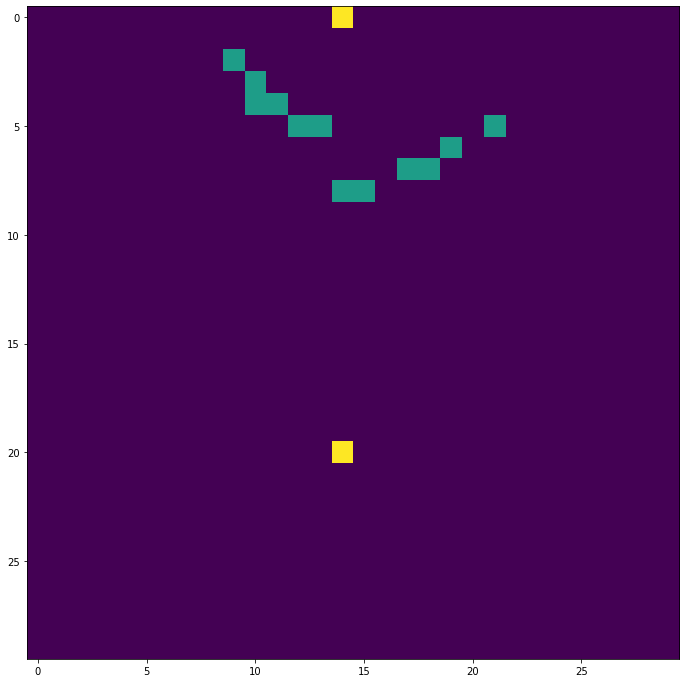

In [232]:
plt.figure(figsize=(20, 12))
plt.imshow(mapping, interpolation='nearest')
plt.show()

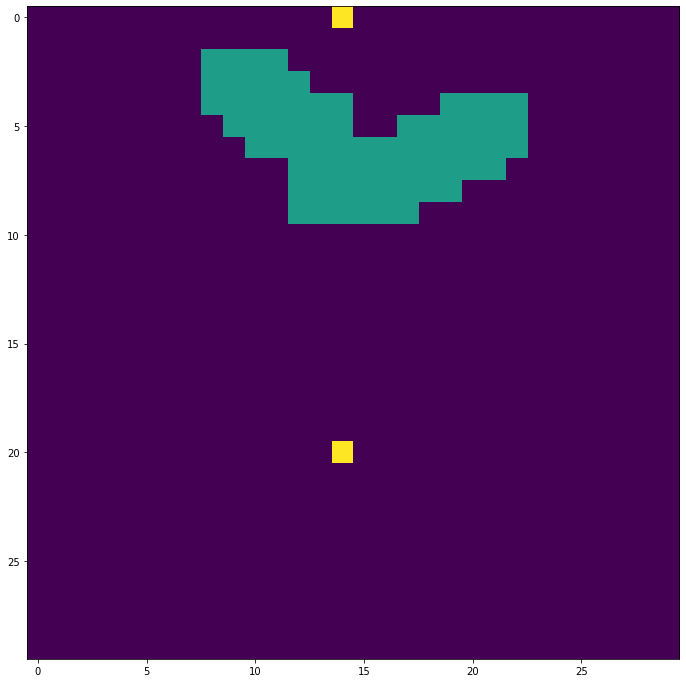

In [220]:
plt.figure(figsize=(20, 12))
plt.imshow(mapping, interpolation='nearest')
plt.show()

## Routing

In [210]:
rtest = mapping.copy()
# rtest

In [211]:
def _get_north(point):
    x, y = point
    return (x-1,y)

def _get_south(point):
    x, y = point
    return (x+1,y)

def _get_east(point):
    x, y = point
    return (x,y+1)

def _get_west(point):
    x, y = point
    return (x,y-1)

def _get_city_neighbor(point, xmax, ymax):
    x, y = point
    neighbors = []
    
    if x == 0:
        neighbors.append(_get_south(point))
    elif x == (xmax-1):
        neighbors.append(_get_north(point))
    else:
        neighbors.append(_get_south(point))
        neighbors.append(_get_north(point))
    
    if y == 0:
        neighbors.append(_get_east(point))
    elif y == (ymax-1):
        neighbors.append(_get_west(point))
    else:
        neighbors.append(_get_east(point))
        neighbors.append(_get_west(point))
        
    return neighbors
    
def get_neighbors(point, mapping):

#     x, y = point
    xmax, ymax = mapping.shape
    
    points = []
    weights = []
    
    neighbors = _get_city_neighbor(point, xmax, ymax)
    
    weights = []
    for n in (neighbors):
        map_weight = mapping[n[0]][n[1]]
        if map_weight == 0:
            weights.append(1)
        else: #obstacle
            weights.append(999) 
    
    return neighbors, weights

In [212]:
from queue import PriorityQueue

def heuristic(start, goal): 
    x1, y1 = start
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)

# code below based off of https://www.redblobgames.com/pathfinding/a-star/implementation.html#python-astar
def a_star(start, goal, mapping):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    path = {}
    running_cost = {}
    
    path[start] = None
    running_cost[start] = 0
    
    while frontier.qsize() > 0:
        current = frontier.get()
        
        if current == goal:
            break
        
        neighbors, costs = get_neighbors(current, mapping)
        
        for i, nxt in enumerate(neighbors):
            cost = costs[i]
            new_cost = running_cost[current] + cost
            if (nxt not in path) or (new_cost < running_cost[nxt]):
                running_cost[nxt] = new_cost
                priority = new_cost + heuristic(nxt, goal)
                frontier.put(nxt, priority)
                path[nxt] = current  
    
    return path, running_cost    
    
start = (0,14)
goal = (20,14)
testp = (3,14)

path, cost_so_far = a_star(start, goal, rtest)

In [215]:
def make_route(path, start, goal, route=[]):
    prev = path[goal]
    route.append(prev)
    
    if prev == start:
        return route
    else:    
        route = make_route(path, start, prev, route)
        return route

route = make_route(path, start, goal)

route.reverse()
route.append(goal)
# route

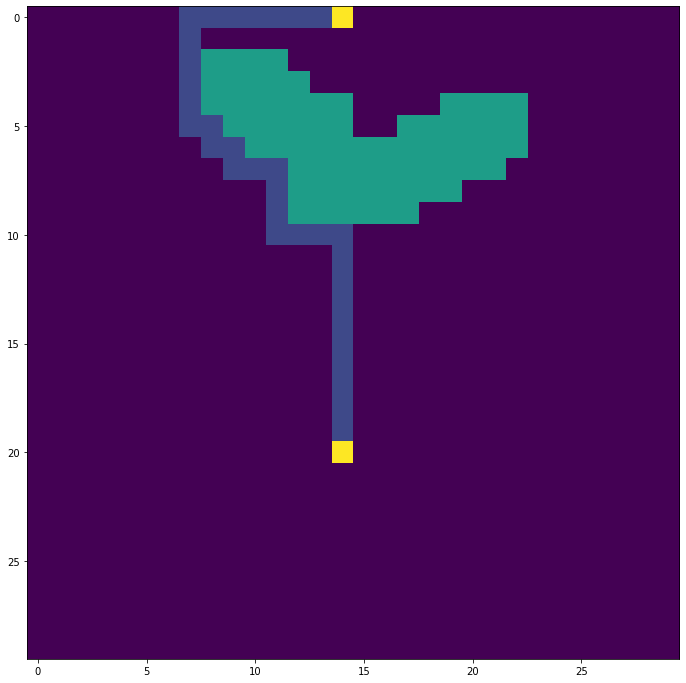

In [219]:
def draw_route(mapping, route):
    return_map = mapping.copy()
    for r in route:
        return_map[r[0]][r[1]] = 2
        
    return return_map
    
path_map = draw_route(rtest, route)
path_map[start[0]][start[1]] = 9
path_map[goal[0]][goal[1]] = 9

plt.figure(figsize=(20, 12))
plt.imshow(path_map, interpolation='nearest')
plt.show()